In [1]:
#importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading the CSV file ofCO2 emission data

df=pd.read_csv("co2_emissions_kt_by_country.csv")
df


,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675000
1,ABW,Aruba,1961,11576.719000
2,ABW,Aruba,1962,12713.489000
3,ABW,Aruba,1963,12178.107000
4,ABW,Aruba,1964,11840.743000
...,...,...,...,...
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114


In [3]:
#viewing the first five records of the dataset

df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [4]:
#viewing the last five records of the dataset

df.tail()

,country_code,country_name,year,value
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114
13952,ZWE,Zimbabwe,2019,11760.000229


In [5]:
#getting all the statistics of all numerical columns of the dataframe

df.describe()

,year,value
count,13953.000000,1.395300e+04
mean,1990.732316,8.254983e+05
std,17.187585,2.788923e+06
min,1960.000000,-8.067400e+01
25%,1976.000000,1.100000e+03
50%,1992.000000,1.390000e+04
75%,2006.000000,1.642779e+05
max,2019.000000,3.434401e+07


In [6]:
#getting the information of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [7]:
#getting the shape of the dataframe

df.shape

(13953, 4)

In [8]:
#getting the name of the columns of the given dataframe

df.columns

Index(['country_code', 'country_name', 'year', 'value'], dtype='object')

In [9]:
#getting the unique records from the dataset

df.nunique()

country_code     255
country_name     256
year              60
value           9537
dtype: int64

In [10]:
#checking if there are any missing data present in the dataframe

df.isnull().sum()

country_code    0
country_name    0
year            0
value           0
dtype: int64

# Exploratory Data Analysis

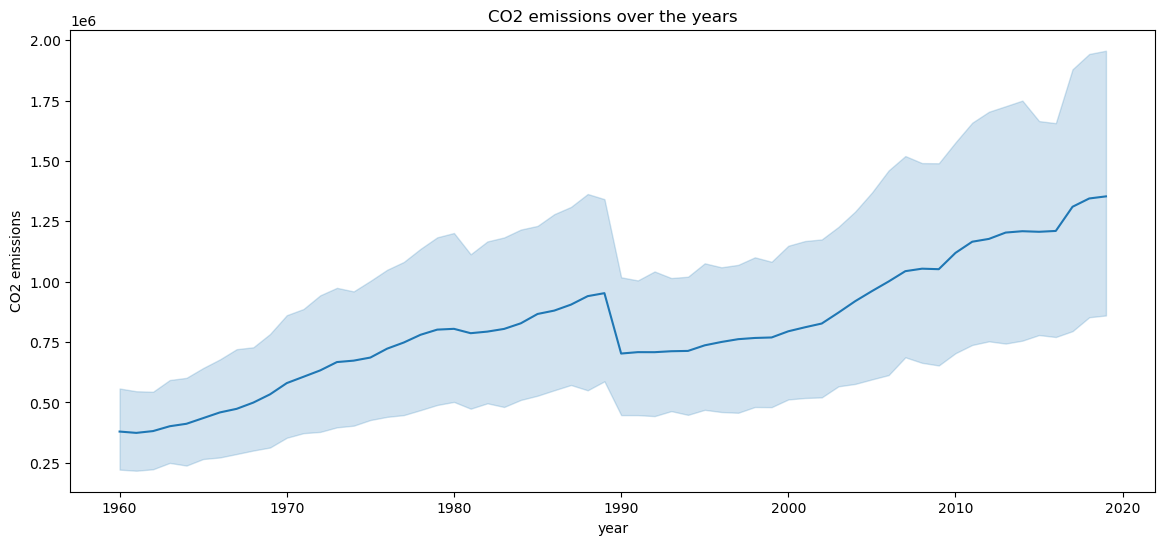

In [11]:
#CO2 emission over the years

plt.figure(figsize=(14,6))
sns.lineplot(x='year',y='value',data=df)
plt.xlabel('year')
plt.ylabel('CO2 emissions')
plt.title('CO2 emissions over the years')
plt.show()

In [12]:
#CO2 emission over last 15 years 

df_by_year=df.groupby('year')[['value']].sum()
last_15_years=df_by_year.tail(15)
last_15_years


,value
year,
2005,2.421461e+08
2006,2.522002e+08
2007,2.629716e+08
2008,2.666201e+08
2009,2.660903e+08
2010,2.831823e+08
2011,2.948560e+08
2012,3.001712e+08
2013,3.068545e+08


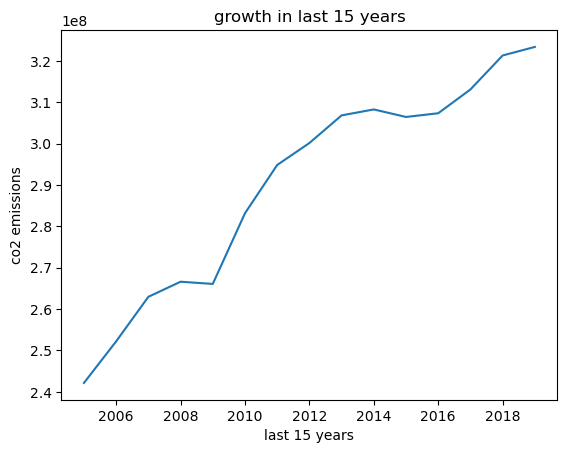

In [13]:
#lineplot of CO2 emission growth over last 15 years

sns.lineplot(x='year',y='value',data=last_15_years)
plt.xlabel('last 15 years')
plt.ylabel('co2 emissions')
plt.title('growth in last 15 years')
plt.show()

In [14]:
#finding unique countries present in the dataframe

df['country_name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding

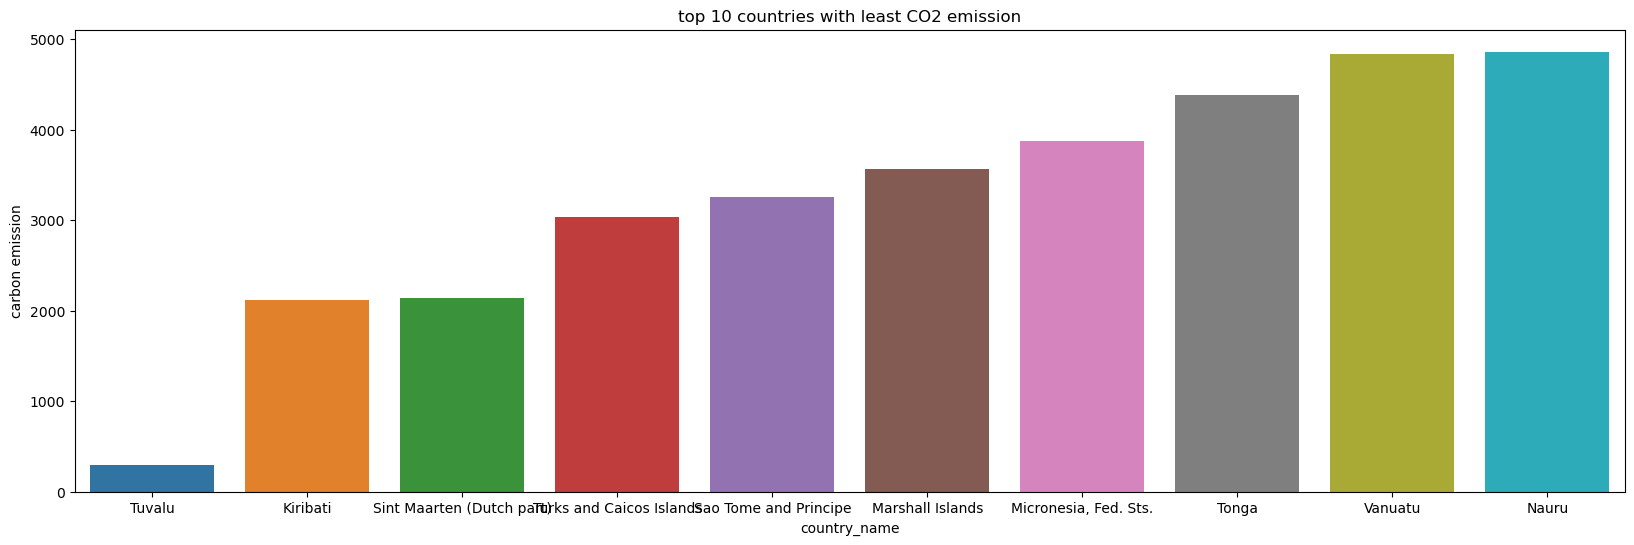

In [15]:
#barplot of top 10 countries with least CO2 emission 

country_least_emission=df.groupby('country_name')['value'].sum().nsmallest(10)
plt.figure(figsize=(20,6))
sns.barplot(x=country_least_emission.index,y=country_least_emission.values)
plt.ylabel('carbon emission')
plt.xlabel('country_name')
plt.title('top 10 countries with least CO2 emission')
plt.show()

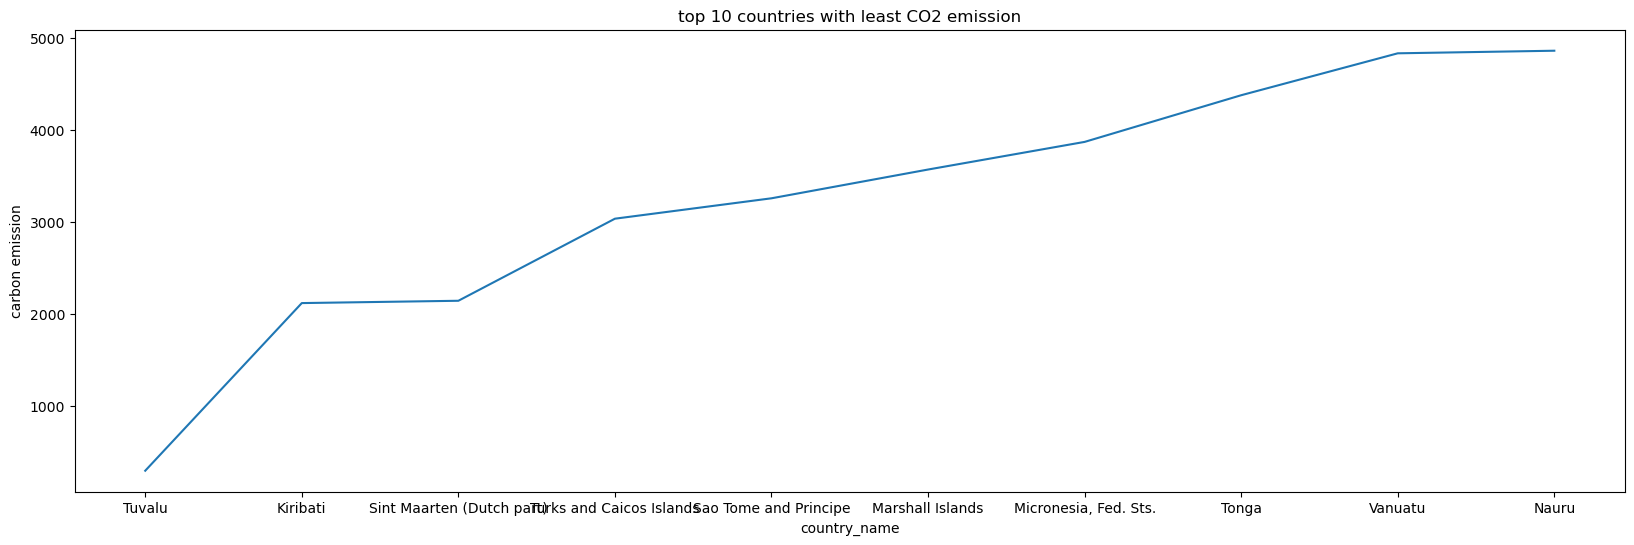

In [16]:
#lineplot of top 10 countries with least CO2 emission

country_least_emission=df.groupby('country_name')['value'].sum().nsmallest(10)
plt.figure(figsize=(20,6))
sns.lineplot(x=country_least_emission.index,y=country_least_emission.values)
plt.ylabel('carbon emission')
plt.xlabel('country_name')
plt.title('top 10 countries with least CO2 emission')
plt.show()

<Axes: ylabel='value'>

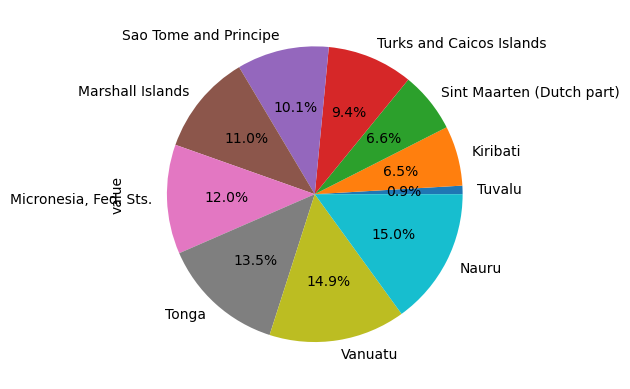

In [17]:
#piechart of top 10 countries with least carbon emission

df.groupby('country_name')['value'].sum().nsmallest(10).plot(kind='pie',autopct='%0.01f%%')

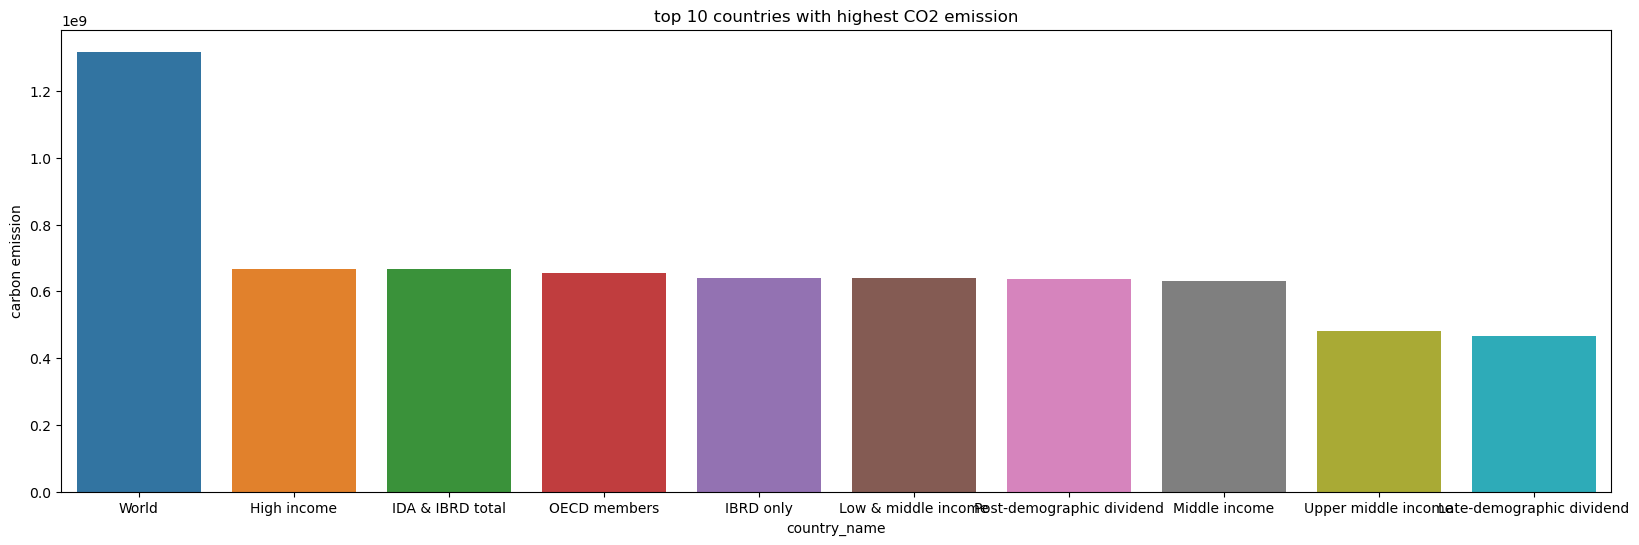

In [18]:
#barchart of top 10 countries with highest CO2 emission

country_highest_emission=df.groupby('country_name')['value'].sum().nlargest(10)
plt.figure(figsize=(20,6))
sns.barplot(x=country_highest_emission.index,y=country_highest_emission.values)
plt.ylabel('carbon emission')
plt.xlabel('country_name')
plt.title('top 10 countries with highest CO2 emission')
plt.show()

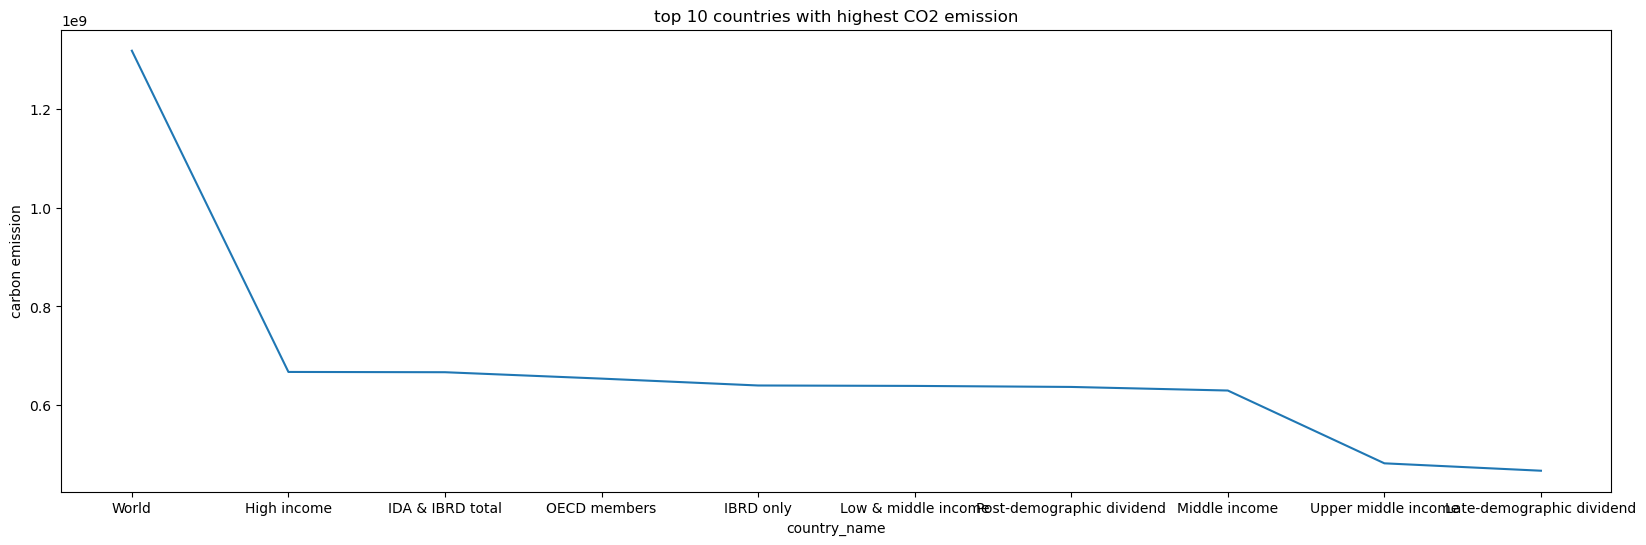

In [19]:
#linechart of top 10 countries with highest CO2 emission

country_highest_emission=df.groupby('country_name')['value'].sum().nlargest(10)
plt.figure(figsize=(20,6))
sns.lineplot(x=country_highest_emission.index,y=country_highest_emission.values)
plt.ylabel('carbon emission')
plt.xlabel('country_name')
plt.title('top 10 countries with highest CO2 emission')
plt.show()

<Axes: ylabel='value'>

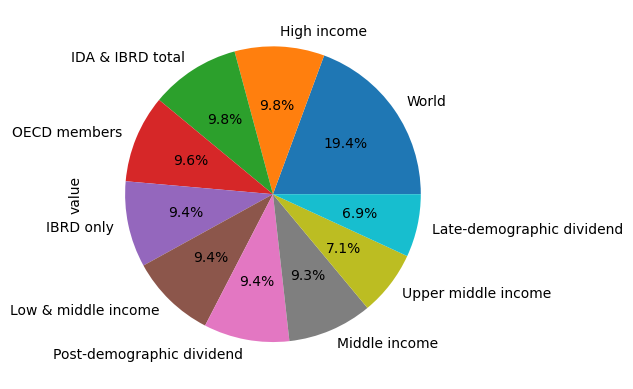

In [20]:
#piechart of top 10 countries with highest CO2 emission
df.groupby('country_name')['value'].sum().nlargest(10).plot(kind='pie',autopct='%0.01f%%')

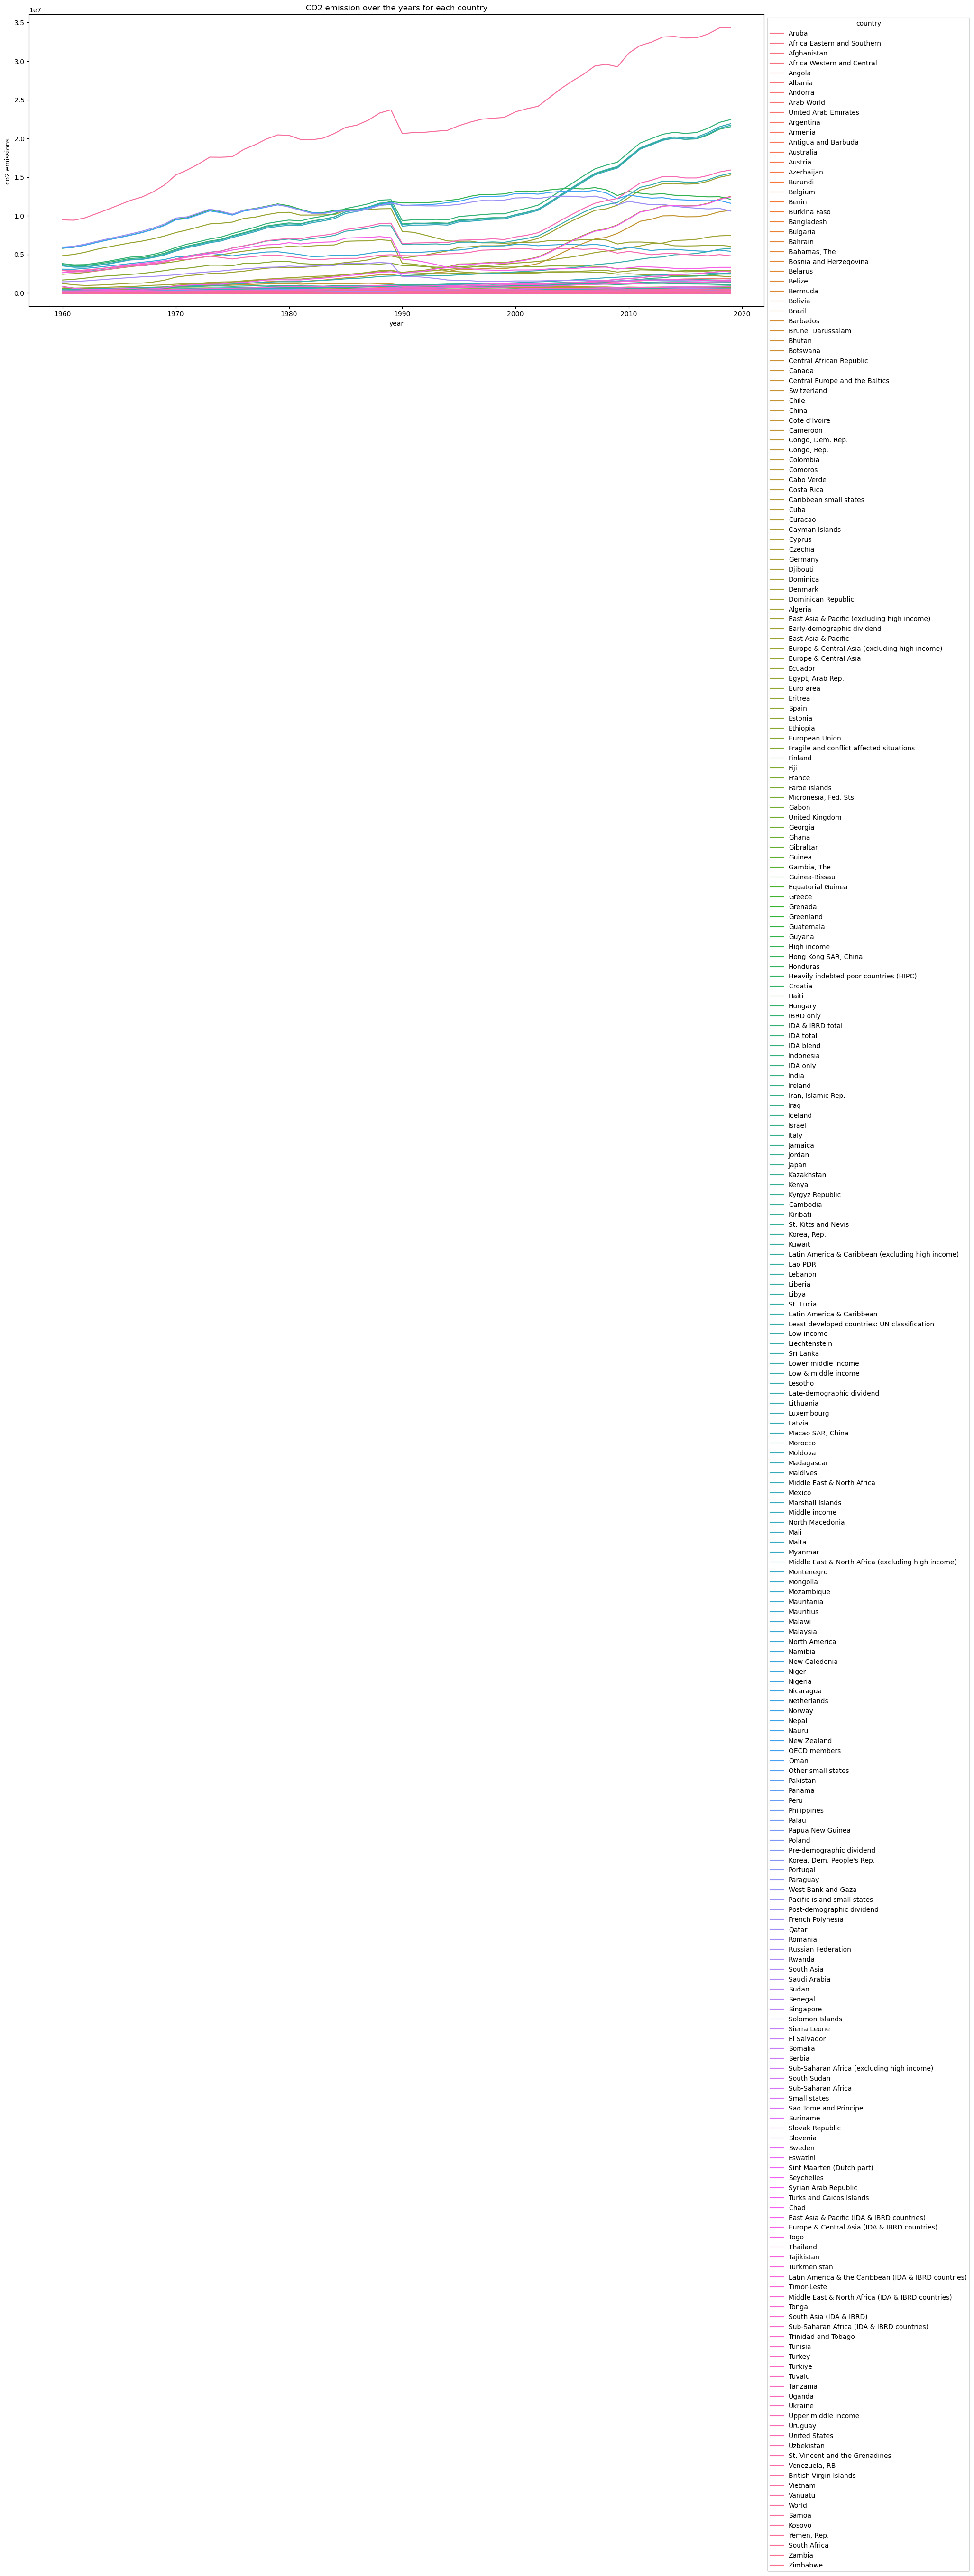

In [21]:
#CO2 emission over the years for all the countries


plt.figure(figsize=(20,8))
sns.lineplot(x='year',y='value',hue='country_name',data=df)
plt.xlabel('year')
plt.ylabel('co2 emissions ')
plt.title('CO2 emission over the years for each country')
plt.legend(title='country',bbox_to_anchor=(1,1))
plt.show()

In [22]:
#CO2 emission growth in world over the years

df_country=df[df['country_name']=='World'].sort_values('year')
df_country

,country_code,country_name,year,value
13592,WLD,World,1960,9.463838e+06
13593,WLD,World,1961,9.423934e+06
13594,WLD,World,1962,9.732506e+06
13595,WLD,World,1963,1.027450e+07
13596,WLD,World,1964,1.082025e+07
13597,WLD,World,1965,1.140258e+07
13598,WLD,World,1966,1.198832e+07
13599,WLD,World,1967,1.241335e+07
13600,WLD,World,1968,1.308735e+07
13601,WLD,World,1969,1.397601e+07


In [23]:
#CO2 emission growth in India over the years

df_country=df[df['country_name']=='India'].sort_values('year')
df_country

,country_code,country_name,year,value
5810,IND,India,1960,1.205820e+05
5811,IND,India,1961,1.304022e+05
5812,IND,India,1962,1.434677e+05
5813,IND,India,1963,1.540837e+05
5814,IND,India,1964,1.506477e+05
5815,IND,India,1965,1.659721e+05
5816,IND,India,1966,1.717659e+05
5817,IND,India,1967,1.722390e+05
5818,IND,India,1968,1.873360e+05
5819,IND,India,1969,1.907243e+05


In [24]:
#CO2 emission growth in China over the years

df_country=df[df['country_name']=='China'].sort_values('year')
df_country

,country_code,country_name,year,value
2100,CHN,China,1960,7.807263e+05
2101,CHN,China,1961,5.520668e+05
2102,CHN,China,1962,4.403590e+05
2103,CHN,China,1963,4.366957e+05
2104,CHN,China,1964,4.369230e+05
2105,CHN,China,1965,4.759729e+05
2106,CHN,China,1966,5.227895e+05
2107,CHN,China,1967,4.332340e+05
2108,CHN,China,1968,4.689286e+05
2109,CHN,China,1969,5.772371e+05


In [25]:
#CO2 emission growth in Russian Federation over the years

df_country=df[df['country_name']=='Russian Federation'].sort_values('year')
df_country

,country_code,country_name,year,value
10694,RUS,Russian Federation,1960,1.448637e+06
10695,RUS,Russian Federation,1961,1.493932e+06
10696,RUS,Russian Federation,1962,1.567951e+06
10697,RUS,Russian Federation,1963,1.681525e+06
10698,RUS,Russian Federation,1964,1.788304e+06
10699,RUS,Russian Federation,1965,1.897053e+06
10700,RUS,Russian Federation,1966,2.003392e+06
10701,RUS,Russian Federation,1967,2.094843e+06
10702,RUS,Russian Federation,1968,2.153699e+06
10703,RUS,Russian Federation,1969,2.242939e+06


In [26]:
#CO2 emission growth in United States over the years

df_country=df[df['country_name']=='United States'].sort_values('year')
df_country

,country_code,country_name,year,value
13209,USA,United States,1960,2.890696e+06
13210,USA,United States,1961,2.880506e+06
13211,USA,United States,1962,2.987208e+06
13212,USA,United States,1963,3.119231e+06
13213,USA,United States,1964,3.255995e+06
13214,USA,United States,1965,3.390923e+06
13215,USA,United States,1966,3.561878e+06
13216,USA,United States,1967,3.695709e+06
13217,USA,United States,1968,3.831355e+06
13218,USA,United States,1969,4.024749e+06


In [27]:
#CO2 emission growth in Germany over the years

df_country=df[df['country_name']=='Germany'].sort_values('year')
df_country

,country_code,country_name,year,value
2912,DEU,Germany,1990,955310.000000
2913,DEU,Germany,1991,932550.000000
2914,DEU,Germany,1992,892820.000000
2915,DEU,Germany,1993,887060.000000
2916,DEU,Germany,1994,875900.000000
2917,DEU,Germany,1995,874660.000000
2918,DEU,Germany,1996,904340.000000
2919,DEU,Germany,1997,872650.000000
2920,DEU,Germany,1998,865250.000000
2921,DEU,Germany,1999,833590.000000


In [28]:
#CO2 emission growth in Japan over the years

df_country=df[df['country_name']=='Japan'].sort_values('year')
df_country

,country_code,country_name,year,value
6350,JPN,Japan,1960,2.327812e+05
6351,JPN,Japan,1961,2.831181e+05
6352,JPN,Japan,1962,2.932207e+05
6353,JPN,Japan,1963,3.252226e+05
6354,JPN,Japan,1964,3.593183e+05
6355,JPN,Japan,1965,3.869198e+05
6356,JPN,Japan,1966,4.197432e+05
6357,JPN,Japan,1967,4.898819e+05
6358,JPN,Japan,1968,5.625655e+05
6359,JPN,Japan,1969,6.539581e+05


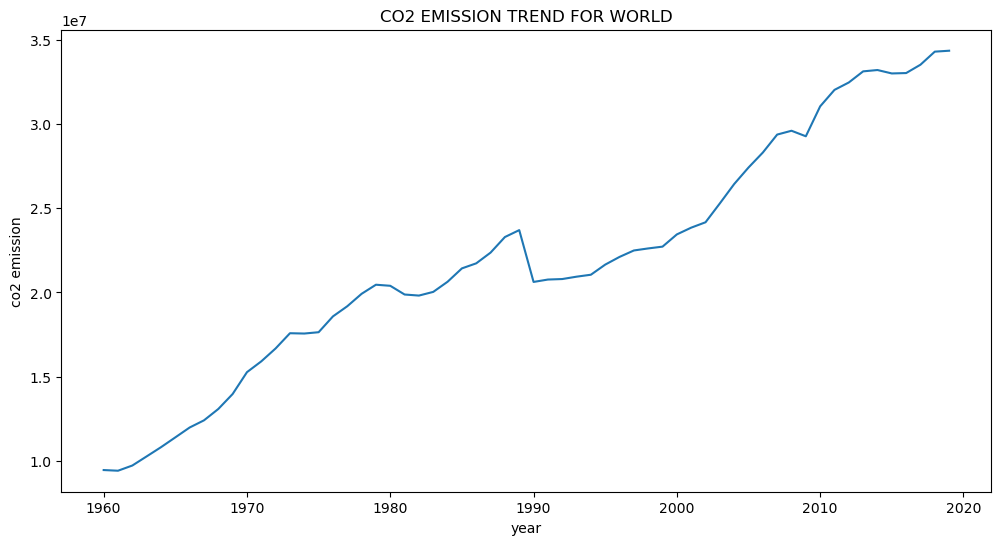

In [29]:
#linechart of CO2 emission growth in World over the years

df_country=df[df['country_name']=='World'].sort_values('year')
plt.figure(figsize=(12,6))
sns.lineplot(x=df_country['year'],y=df_country['value'])
plt.xlabel('year')
plt.ylabel('co2 emission')
plt.title('CO2 EMISSION TREND FOR WORLD')
plt.show()

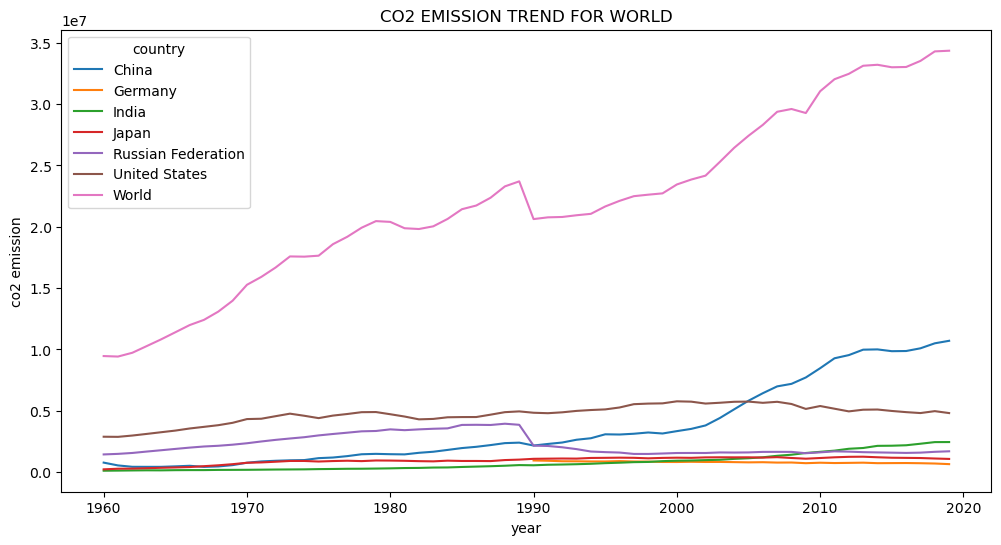

In [30]:
#comparison of CO2 emission growth between world and some popular Countries


countries=['India','China','United States','Russian Federation','Germany','Japan','World']

country_emission_comparison=df[df['country_name'].isin(countries)]
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='value',hue="country_name",data=country_emission_comparison)
plt.xlabel('year')
plt.ylabel('co2 emission')
plt.title('CO2 EMISSION TREND FOR WORLD')
plt.legend(title='country')
plt.show()